# Investigating Posts that Peform Similarly 
Our client is interested in knowing which posts perform well, can we group these together and find similar factors?

# 1. Import Data

In [1]:
import pandas as pd

%load_ext jupyter_black

In [2]:
df = pd.read_csv("clusterdata.csv")

In [3]:
df

user_id   published post_type  \
0     af60c7da-acb4-11ec-880a-a0cec8d2d278  1648512000     short   
1     af60c7e4-acb4-11ec-ab31-a0cec8d2d278  1647993600     short   
2     af60c7f9-acb4-11ec-bead-a0cec8d2d278  1647907200     short   
3     af60c815-acb4-11ec-a572-a0cec8d2d278  1648080000     short   
4     af60c80d-acb4-11ec-aeb5-a0cec8d2d278  1647820800     short   
...                                    ...         ...       ...   
7042  af60c816-acb4-11ec-b01d-a0cec8d2d278  1648166400     photo   
7043  af60c7fd-acb4-11ec-8226-a0cec8d2d278  1647993600     short   
7044  af60c7e0-acb4-11ec-9163-a0cec8d2d278  1648166400     short   
7045  af60c7f6-acb4-11ec-ba47-a0cec8d2d278  1647388800     short   
7046  af60c7d9-acb4-11ec-84c2-a0cec8d2d278  1648166400     video   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               216            58           5         53         18        12   
1               196            45           0         73         35         8   
2               138             6          13         59         33         5   
3                81             9           1          9         34        18   
4               166            53          11         75          0         5   
...             ...           ...         ...        ...        ...       ...   
7042            293            15          25        173         79         9   
7043            119            14           0         24         58         8   
7044            100             9           5          0         46        25   
7045             74            10           8          0         38        15   
7046            225            46           7        142         23        11   

      num_hahas  num_sads  num_angrys  
0            21         6          43  
1            16        25          39  
2            16        12          13  
3            11         4           5  
4            17        24          45  
...         ...       ...         ...  
7042         15        17           0  
7043         15        13           1  
7044         13         8           8  
7045         16         0           5  
7046         30        19           0  

[7047 rows x 12 columns]

# 2. Split Data into Training and Testing

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(df, test_size=0.3, random_state=1234)

In [6]:
train.shape

(4932, 12)

In [7]:
test.shape

(2115, 12)

# 3. Exploratory Data Analysis

## Review Data

In [8]:
train.dtypes

user_id          object
published         int64
post_type        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
dtype: object

In [9]:
train.post_type.unique()

array(['short', 'video', 'photo', 'text'], dtype=object)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4932 entries, 5145 to 2863
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        4932 non-null   object
 1   published      4932 non-null   int64 
 2   post_type      4932 non-null   object
 3   num_reactions  4932 non-null   int64 
 4   num_comments   4932 non-null   int64 
 5   num_shares     4932 non-null   int64 
 6   num_likes      4932 non-null   int64 
 7   num_loves      4932 non-null   int64 
 8   num_wows       4932 non-null   int64 
 9   num_hahas      4932 non-null   int64 
 10  num_sads       4932 non-null   int64 
 11  num_angrys     4932 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 500.9+ KB


In [11]:
train.isnull().sum()

user_id          0
published        0
post_type        0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

## Summary Stats

In [12]:
train.describe()

published  num_reactions  num_comments   num_shares    num_likes  \
count  4.932000e+03    4932.000000   4932.000000  4932.000000  4932.000000   
mean   1.647943e+09     189.214923     29.540552     9.145985    85.684712   
std    3.513294e+05      75.843449     20.669640     7.807651    67.498828   
min    1.647389e+09      27.000000      0.000000     0.000000     0.000000   
25%    1.647648e+09     121.000000     10.000000     3.000000    19.000000   
50%    1.647994e+09     191.000000     20.000000     7.000000    79.000000   
75%    1.648253e+09     256.000000     50.000000    14.000000   150.000000   
max    1.648512e+09     378.000000     70.000000    37.000000   239.000000   

         num_loves     num_wows    num_hahas     num_sads   num_angrys  
count  4932.000000  4932.000000  4932.000000  4932.000000  4932.000000  
mean     41.381387    14.974250    18.666464    13.934712    14.573398  
std      24.422694     5.012694     8.141871     9.826429    16.039171  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%      23.000000    12.000000    13.000000     6.000000     1.000000  
50%      37.000000    15.000000    17.000000    13.000000     8.000000  
75%      57.000000    18.000000    24.000000    20.000000    23.000000  
max     127.000000    34.000000    45.000000    51.000000    67.000000

In [13]:
# Select columns that start with 'num_', excluding 'num_reactions'
temp = df.copy()

columns_to_sum = [
    col
    for col in temp[
        ["num_likes", "num_loves", "num_wows", "num_hahas", "num_sads", "num_angrys"]
    ]
]


# Calculate the sum of these columns
temp["sum_of_columns"] = temp[columns_to_sum].sum(axis=1)
temp[["num_reactions", "sum_of_columns"]]

num_reactions  sum_of_columns
0               216             153
1               196             196
2               138             138
3                81              81
4               166             166
...             ...             ...
7042            293             293
7043            119             119
7044            100             100
7045             74              74
7046            225             225

[7047 rows x 2 columns]

In [14]:
train.describe(include="object")

user_id post_type
count                                   4932      4932
unique                                   100         4
top     af60c7c8-acb4-11ec-adad-a0cec8d2d278     short
freq                                      71      3081

## Plot Distributions

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

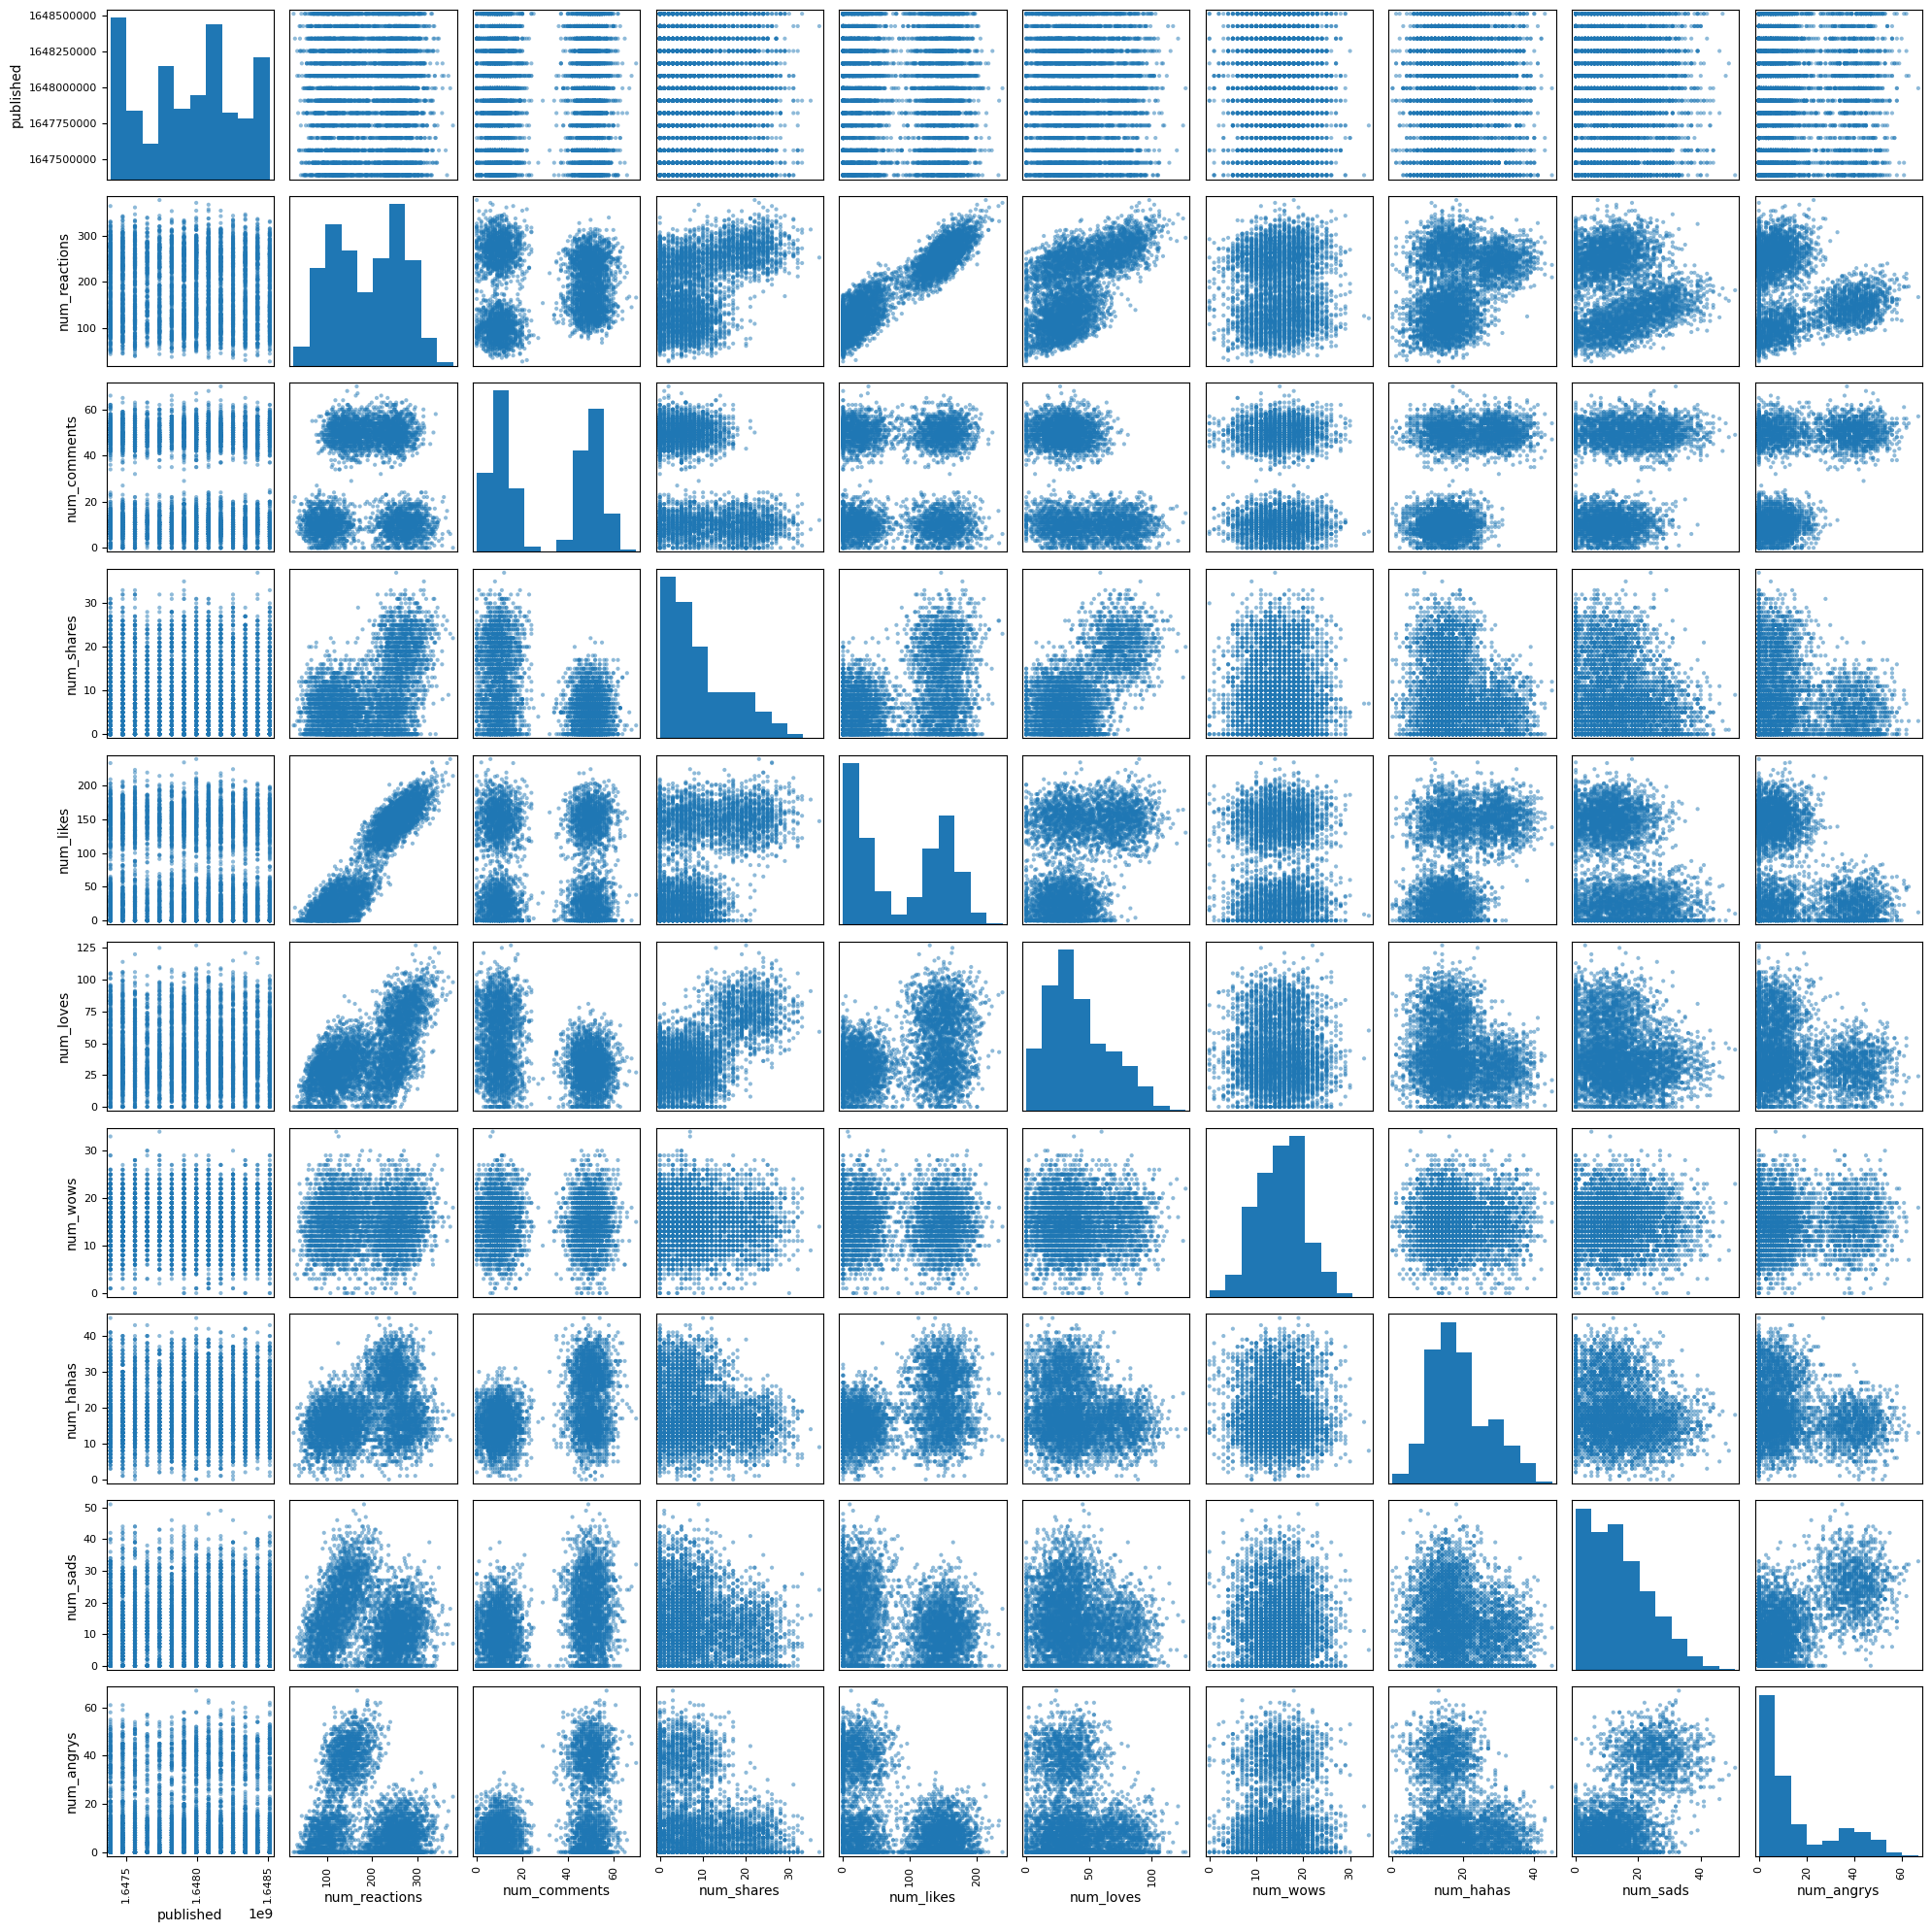

In [16]:
scatter_matrix(train, figsize=(20, 20))
plt.tight_layout()
plt.show()

## Review Types of Posts

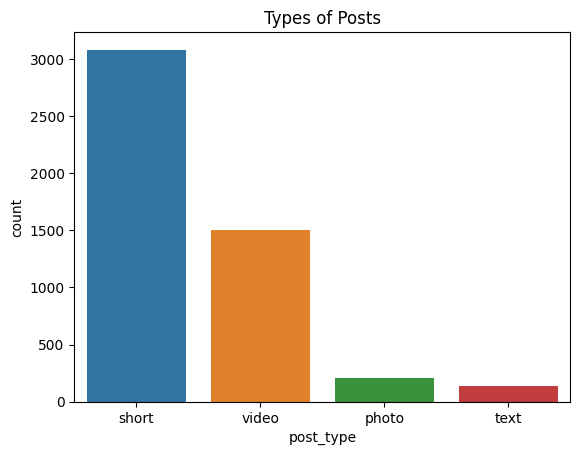

In [17]:
sns.countplot(x="post_type", data=train).set_title("Types of Posts")
plt.show()

## Can we see any relationships between Post Type and Responses

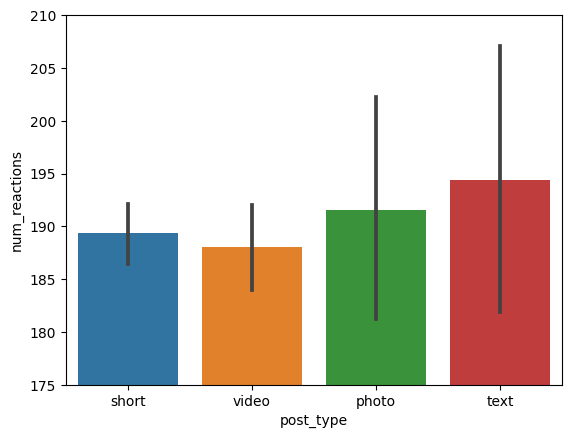

In [18]:
sns.barplot(x="post_type", y="num_reactions", data=train)
plt.ylim((175, 210))
plt.show()

## What does status published represent?

In [19]:
train["published"]

5145    1647734400
5940    1647734400
5046    1647648000
6089    1647388800
3890    1648166400
           ...    
664     1648080000
3276    1647993600
1318    1648166400
723     1648252800
2863    1648252800
Name: published, Length: 4932, dtype: int64

In [20]:
pd.to_datetime(1647993600, unit="s")

Timestamp('2022-03-23 00:00:00')

In [21]:
train["timestamp"] = pd.to_datetime(train["published"], unit="s")

In [22]:
train.timestamp.dt.day

5145    20
5940    20
5046    19
6089    16
3890    25
        ..
664     24
3276    23
1318    25
723     26
2863    26
Name: timestamp, Length: 4932, dtype: int32

## Is there a relationship with time?

In [23]:
train["day"] = train["timestamp"].dt.day
train["day_name"] = train["timestamp"].dt.day_name()
train["monthstart"] = train["timestamp"].dt.is_month_start
train["monthend"] = train["timestamp"].dt.is_month_end
train["quarterstart"] = train["timestamp"].dt.is_quarter_start
train["quarterend"] = train["timestamp"].dt.is_quarter_end
train["month"] = train["timestamp"].dt.month

In [24]:
train.head()

user_id   published post_type  \
5145  af60c7e1-acb4-11ec-a565-a0cec8d2d278  1647734400     short   
5940  af60c819-acb4-11ec-ac22-a0cec8d2d278  1647734400     video   
5046  af60c813-acb4-11ec-9b28-a0cec8d2d278  1647648000     video   
6089  af60c809-acb4-11ec-8a3c-a0cec8d2d278  1647388800     short   
3890  af60c7e2-acb4-11ec-9952-a0cec8d2d278  1648166400     video   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
5145            378             0          22        214         98        18   
5940            248            11          24        127         69        19   
5046            147            57           0         26         57        12   
6089            114            51           6          2         22         7   
3890            158            47           0         28         39         7   

      num_hahas  num_sads  num_angrys  timestamp  day   day_name  monthstart  \
5145         18         7          23 2022-03-20   20     Sunday       False   
5940          8        25           0 2022-03-20   20     Sunday       False   
5046          4        14          34 2022-03-19   19   Saturday       False   
6089         21        22          40 2022-03-16   16  Wednesday       False   
3890         12        33          39 2022-03-25   25     Friday       False   

      monthend  quarterstart  quarterend  month  
5145     False         False       False      3  
5940     False         False       False      3  
5046     False         False       False      3  
6089     False         False       False      3  
3890     False         False       False      3

In [25]:
# We've only got one month of data
train.month.unique()

array([3], dtype=int32)

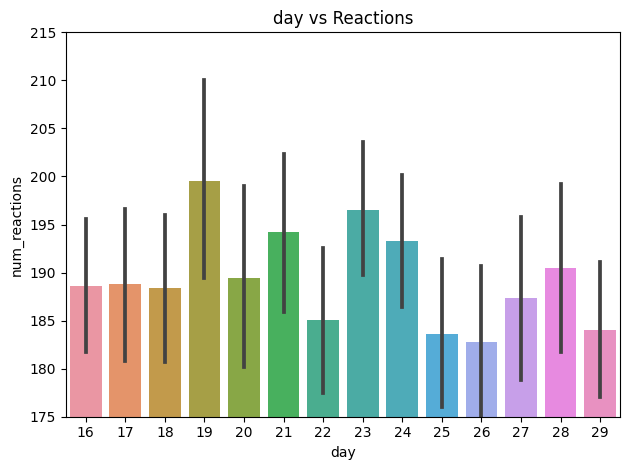

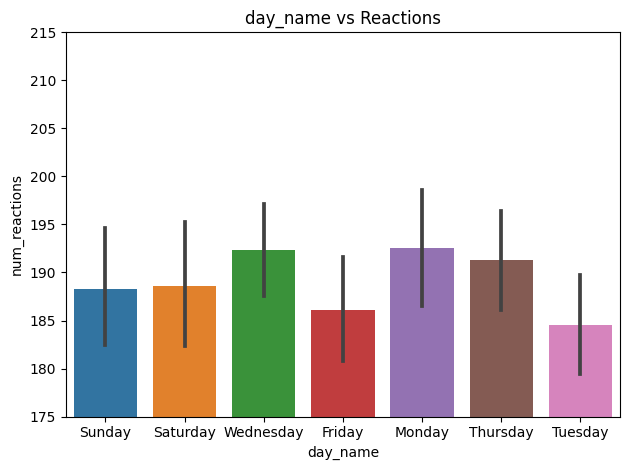

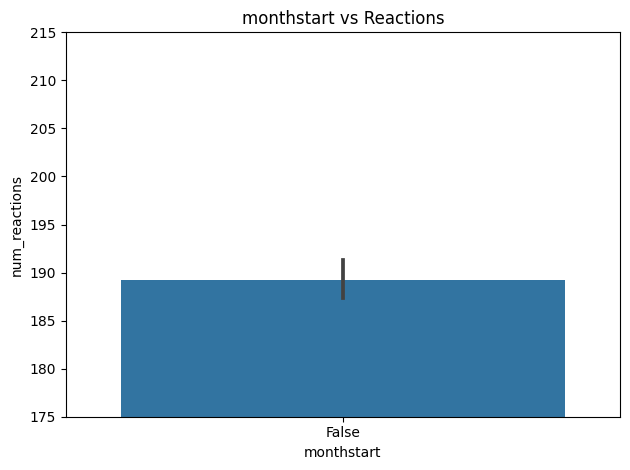

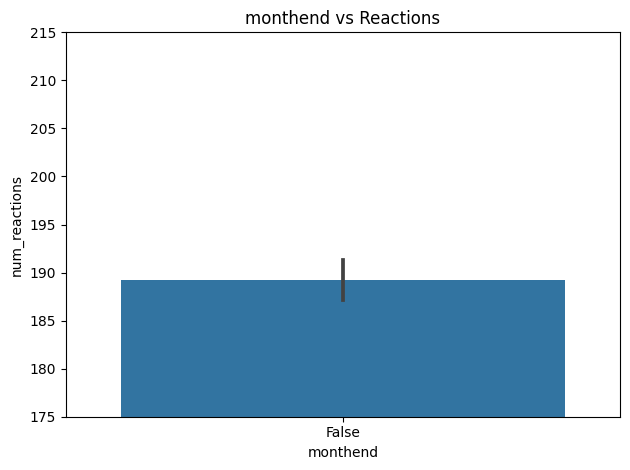

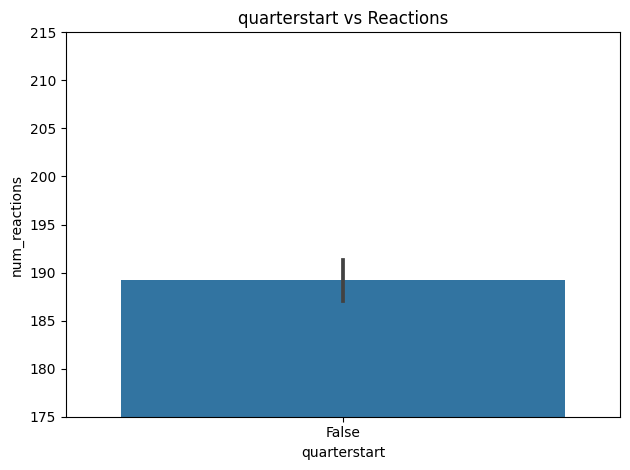

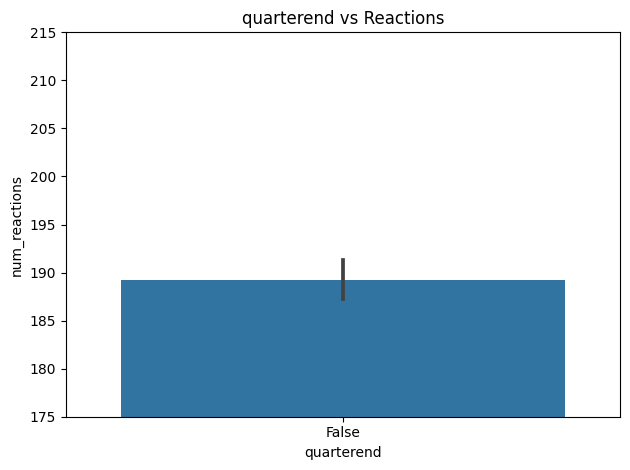

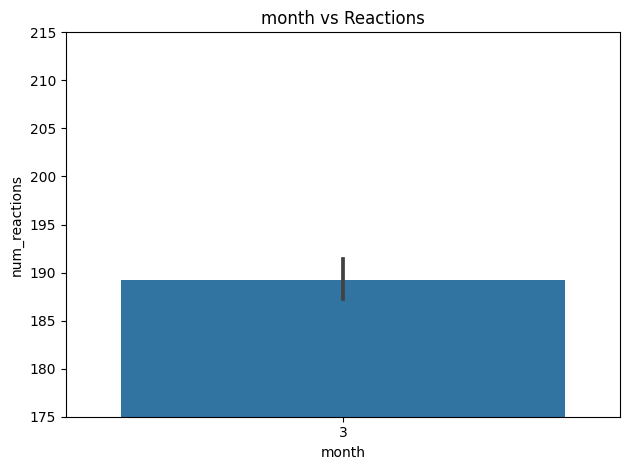

In [26]:
for col in train.columns[-7:]:
    sns.barplot(x=col, y="num_reactions", data=train).set_title(f"{col} vs Reactions")
    plt.ylim((175, 215))
    plt.tight_layout()
    plt.show()

In [27]:
train = train.drop(
    [
        "timestamp",
        "published",
        "day",
        "monthstart",
        "monthend",
        "quarterstart",
        "quarterend",
        "month",
    ],
    axis=1,
)

In [28]:
train.columns

Index(['user_id', 'post_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys', 'day_name'],
      dtype='object')

# 4. Data Preprocessing

## Scale Features

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [35]:
# Standard Scale the numeric features
scaler = StandardScaler()
scaled = scaler.fit_transform(train.select_dtypes(include=[np.number]).to_numpy())

In [36]:
scaled

array([[ 2.48939388, -1.42932083,  1.64650258, ..., -0.08186465,
        -0.70579203,  0.52542966],
       [ 0.77516302, -0.89708537,  1.90268753, ..., -1.31020805,
         1.12618836, -0.90870506],
       [-0.55666249,  1.32862658, -1.17153193, ..., -1.80154541,
         0.00664479,  1.21132018],
       ...,
       [-0.43798497,  0.94154624, -0.65916202, ...,  0.28663836,
         0.92263498,  2.14662544],
       [-1.50608266, -0.60677512, -0.27488459, ..., -0.45036767,
        -0.29868528, -0.65929033],
       [ 0.55099437,  0.84477615, -0.14679211, ...,  2.2519878 ,
        -1.21467547, -0.16046086]])

## One Hot Encode Status Type

In [37]:
train.dtypes

user_id          object
post_type        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
day_name         object
dtype: object

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
onehot = OneHotEncoder(handle_unknown="ignore")
encoded = onehot.fit_transform(train.select_dtypes(exclude=[np.number])).toarray()

In [47]:
encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [48]:
onehot.get_feature_names_out()

array(['user_id_af60c7c0-acb4-11ec-b646-a0cec8d2d278',
       'user_id_af60c7c1-acb4-11ec-8cb0-a0cec8d2d278',
       'user_id_af60c7c2-acb4-11ec-8608-a0cec8d2d278',
       'user_id_af60c7c3-acb4-11ec-97e2-a0cec8d2d278',
       'user_id_af60c7c4-acb4-11ec-9d00-a0cec8d2d278',
       'user_id_af60c7c5-acb4-11ec-83fd-a0cec8d2d278',
       'user_id_af60c7c6-acb4-11ec-918b-a0cec8d2d278',
       'user_id_af60c7c7-acb4-11ec-b103-a0cec8d2d278',
       'user_id_af60c7c8-acb4-11ec-adad-a0cec8d2d278',
       'user_id_af60c7c9-acb4-11ec-9a3b-a0cec8d2d278',
       'user_id_af60c7ca-acb4-11ec-87b8-a0cec8d2d278',
       'user_id_af60c7cb-acb4-11ec-b3b4-a0cec8d2d278',
       'user_id_af60c7cc-acb4-11ec-b9c1-a0cec8d2d278',
       'user_id_af60c7cd-acb4-11ec-a542-a0cec8d2d278',
       'user_id_af60c7ce-acb4-11ec-b2df-a0cec8d2d278',
       'user_id_af60c7cf-acb4-11ec-96a2-a0cec8d2d278',
       'user_id_af60c7d0-acb4-11ec-935e-a0cec8d2d278',
       'user_id_af60c7d1-acb4-11ec-ab28-a0cec8d2d278',
       'us

In [50]:
X_train = np.c_[scaled, encoded]

In [52]:
X_train.shape

(4932, 120)

# 5. Modelling

## Fit Models with a Range of Clusters

In [53]:
from sklearn.cluster import KMeans

In [57]:
fit_models = {}
for k in range(2, 21):
    model = KMeans(n_clusters=k, n_init="auto")
    model.fit(X_train)
    fit_models[k] = model

In [58]:
fit_models

{2: KMeans(n_clusters=2, n_init='auto'),
 3: KMeans(n_clusters=3, n_init='auto'),
 4: KMeans(n_clusters=4, n_init='auto'),
 5: KMeans(n_clusters=5, n_init='auto'),
 6: KMeans(n_clusters=6, n_init='auto'),
 7: KMeans(n_clusters=7, n_init='auto'),
 8: KMeans(n_init='auto'),
 9: KMeans(n_clusters=9, n_init='auto'),
 10: KMeans(n_clusters=10, n_init='auto'),
 11: KMeans(n_clusters=11, n_init='auto'),
 12: KMeans(n_clusters=12, n_init='auto'),
 13: KMeans(n_clusters=13, n_init='auto'),
 14: KMeans(n_clusters=14, n_init='auto'),
 15: KMeans(n_clusters=15, n_init='auto'),
 16: KMeans(n_clusters=16, n_init='auto'),
 17: KMeans(n_clusters=17, n_init='auto'),
 18: KMeans(n_clusters=18, n_init='auto'),
 19: KMeans(n_clusters=19, n_init='auto'),
 20: KMeans(n_clusters=20, n_init='auto')}

## Select Best Cluster size using Elbow Method

In [59]:
results = []
for k, model in fit_models.items():
    res = model.inertia_
    results.append(res)

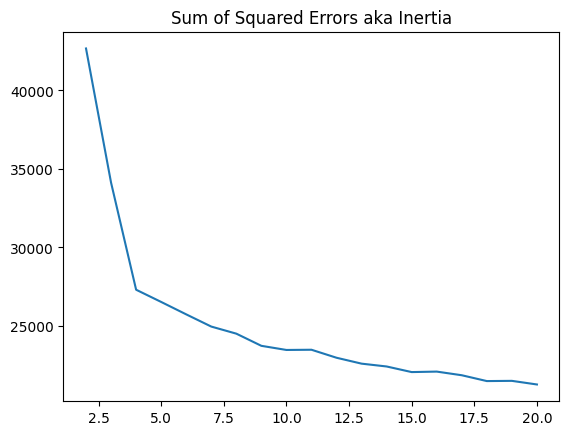

In [67]:
plt.title("Sum of Squared Errors aka Inertia")
plt.plot(range(2, 21), results)
plt.show()

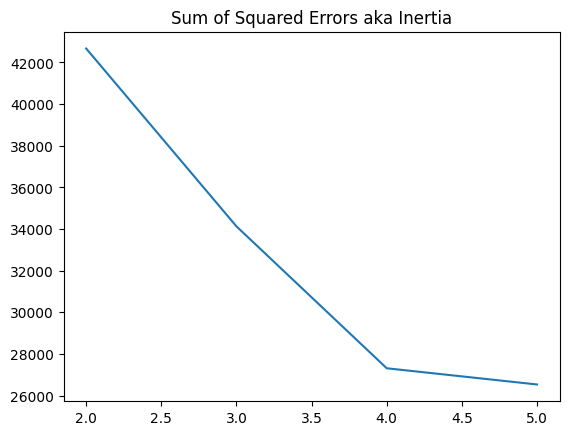

In [66]:
plt.title("Sum of Squared Errors aka Inertia")
plt.plot(range(2, 6), results[:4])
plt.show()

# 6. Evaluate Models

## Choose Model and Make Predictions

In [69]:
model = fit_models[4]
model

KMeans(n_clusters=4, n_init='auto')

In [98]:
def transform(raw_df, onehot, scaler):
    X = raw_df.copy()
    X["timestamp"] = pd.to_datetime(X["published"], unit="s")
    X["day_name"] = X["timestamp"].dt.day_name()
    X = X.drop(["timestamp", "published"], axis=1)

    encoded = onehot.transform(X.select_dtypes(exclude=[np.number])).toarray()
    scaled = scaler.transform(X.select_dtypes(include=[np.number]).to_numpy())

    return np.c_[scaled, encoded]

In [101]:
X_test = transform(test, onehot, scaler)
X_test.shape

(2115, 120)

In [102]:
X_train.shape

(4932, 120)

In [104]:
clusters = model.predict(X_test)
test["cluster"] = clusters
test

user_id   published post_type  \
4545  af60c7fa-acb4-11ec-9224-a0cec8d2d278  1648166400     short   
2627  af60c7d0-acb4-11ec-935e-a0cec8d2d278  1647820800     video   
1076  af60c80f-acb4-11ec-87f7-a0cec8d2d278  1647907200     video   
4824  af60c7e5-acb4-11ec-accd-a0cec8d2d278  1647388800      text   
3411  af60c7d5-acb4-11ec-8bf8-a0cec8d2d278  1647993600     short   
...                                    ...         ...       ...   
3630  af60c7c5-acb4-11ec-83fd-a0cec8d2d278  1647475200     short   
2332  af60c81b-acb4-11ec-853f-a0cec8d2d278  1648252800     short   
4675  af60c7f0-acb4-11ec-9a68-a0cec8d2d278  1647648000     video   
1214  af60c819-acb4-11ec-ac22-a0cec8d2d278  1647561600     short   
4598  af60c7db-acb4-11ec-9ecf-a0cec8d2d278  1647907200     video   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
4545            129            53           9         21         13        13   
2627            205             6          18        140         40         7   
1076            252             3          28        149         60        19   
4824            259            54           0        155         49        15   
3411            105            12           4         49         16        11   
...             ...           ...         ...        ...        ...       ...   
3630            163            50           4         41         20        17   
2332            255            58           9        154         35        22   
4675            269            12          16        157         67         5   
1214            145            48           0         13         54        16   
4598            291            54          10        169         57        15   

      num_hahas  num_sads  num_angrys  cluster  
4545         19        29          34        2  
2627         15         3           0        0  
1076         14         8           2        0  
4824         26         0          14        3  
3411         10         8          11        1  
...         ...       ...         ...      ...  
3630          8        28          49        2  
2332         28         2          14        3  
4675         15        16           9        0  
1214         16        14          32        2  
4598         29         0          21        3  

[2115 rows x 13 columns]

In [105]:
test["cluster"].unique()

array([2, 0, 3, 1], dtype=int32)

## Are cluster 0 posts performing the best?

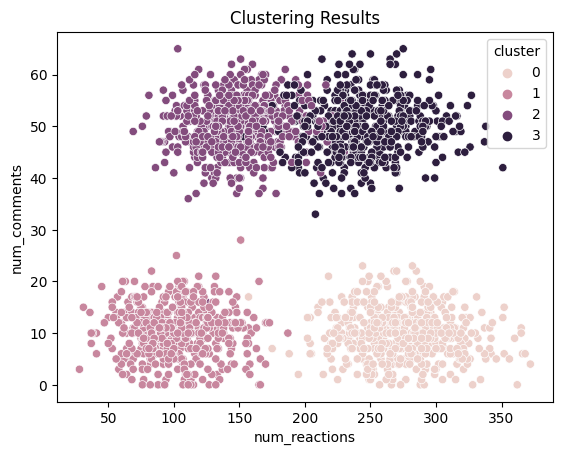

In [106]:
plt.title("Clustering Results")
sns.scatterplot(x="num_reactions", y="num_comments", hue="cluster", data=test)
plt.show()

In [107]:
test.dtypes

user_id          object
published         int64
post_type        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
cluster           int32
dtype: object

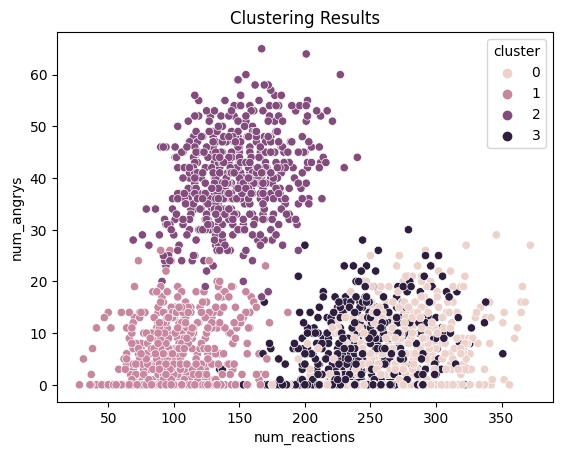

In [108]:
plt.title("Clustering Results")
sns.scatterplot(x="num_reactions", y="num_angrys", hue="cluster", data=test)
plt.show()

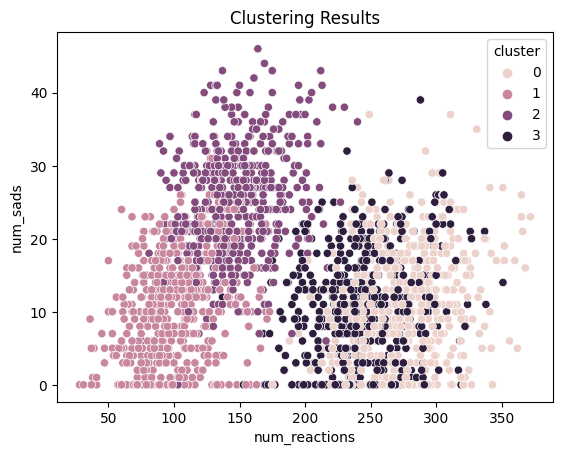

In [109]:
plt.title("Clustering Results")
sns.scatterplot(x="num_reactions", y="num_sads", hue="cluster", data=test)
plt.show()

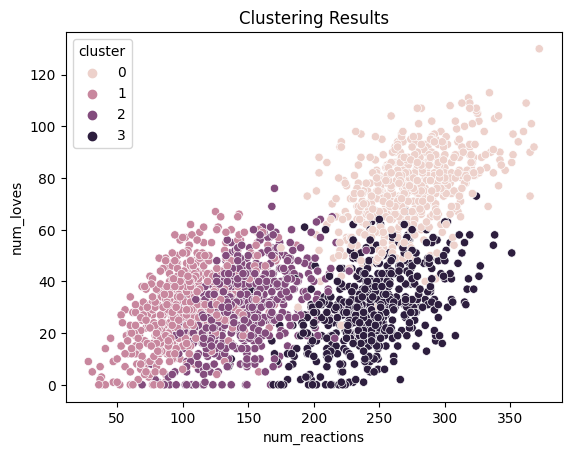

In [110]:
plt.title("Clustering Results")
sns.scatterplot(x="num_reactions", y="num_loves", hue="cluster", data=test)
plt.show()

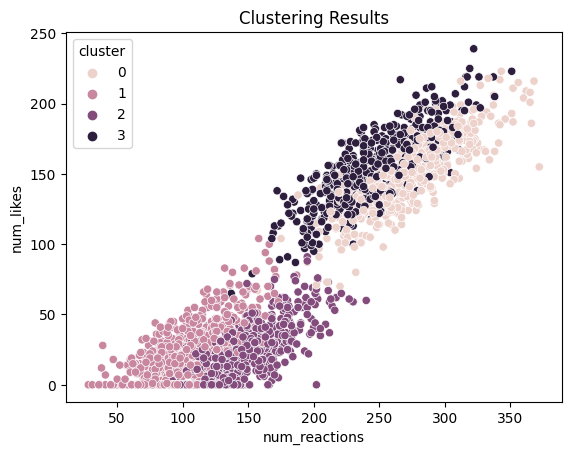

In [111]:
plt.title("Clustering Results")
sns.scatterplot(x="num_reactions", y="num_likes", hue="cluster", data=test)
plt.show()

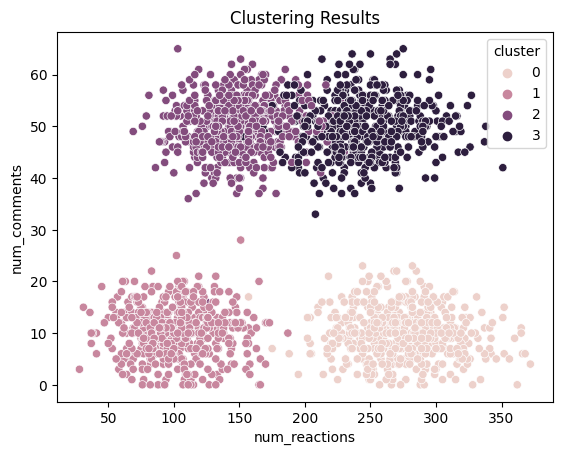

In [112]:
plt.title("Clustering Results")
sns.scatterplot(x="num_reactions", y="num_comments", hue="cluster", data=test)
plt.show()

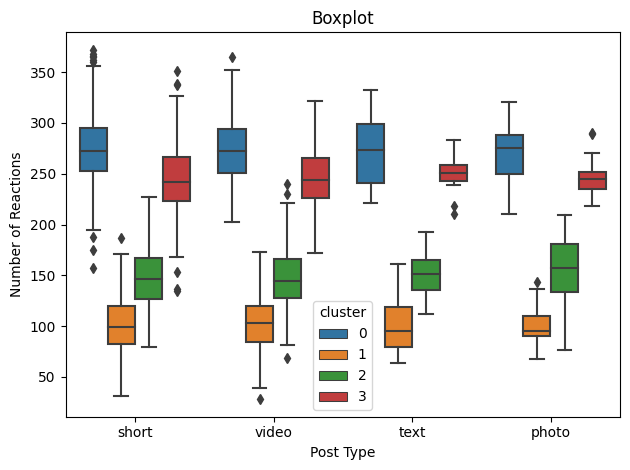

In [120]:
# Boxplot
sns.boxplot(x="post_type", y="num_reactions", hue="cluster", data=test)
plt.title("Boxplot")
plt.xlabel("Post Type")
plt.ylabel("Number of Reactions")
plt.tight_layout()
plt.show()

## Does Cluster Zero have a higher number of Reactions on Average?
- Alternative specifies what the alternative hypothesis represents
- two-sided: $H_0:a=b$, $H_a:a \neq b$
- less: $H_0:a>=b$, $H_a:a<b$
- greater: $H_0:a<=b$, $H_a:a>b$                

In [124]:
from scipy.stats import ttest_ind

In [149]:
# Sample 1: Cluster 0 number of reactions
cluster_zero_samples = test[test["cluster"] == 0]["num_reactions"]
# Sample 2: Cluster 0,1,2, number of reactions
cluster_other_samples = test[test["cluster"] == 3]["num_reactions"]

In [134]:
cluster_zero_samples

4824    259
3052    236
240     262
3778    287
830     231
       ... 
4159    258
5121    238
326     200
2332    255
4598    291
Name: num_reactions, Length: 524, dtype: int64

# Hypothesis Test 
1. 95%, alpha 1-0.95 = 0.05 
2. Formulate hypotheses  
- H0:  Cluster 0 number of reactions <= Cluster 1,2,3 number of reactions
- HA:  Cluster 0 mean number of reactions > Cluster 1,2,3 number of reactions
3. pvalue < 0.05, reject our null hypothesis which is lending support to the HA


In [150]:
comparison = ttest_ind(
    cluster_zero_samples, cluster_other_samples, alternative="greater", equal_var=False
)

In [151]:
comparison.pvalue

1.619320101455817e-43

Reject the null H0, lending support to HA
- Cluster 0 is performing well versus the other clusters

# 7. Deploy

## Score on all Data

In [152]:
X = transform(df, onehot, scaler)

In [153]:
clusters = model.predict(X)

In [154]:
df["cluster"] = clusters
df.to_csv("cluster_results.csv")

In [155]:
df

user_id   published post_type  \
0     af60c7da-acb4-11ec-880a-a0cec8d2d278  1648512000     short   
1     af60c7e4-acb4-11ec-ab31-a0cec8d2d278  1647993600     short   
2     af60c7f9-acb4-11ec-bead-a0cec8d2d278  1647907200     short   
3     af60c815-acb4-11ec-a572-a0cec8d2d278  1648080000     short   
4     af60c80d-acb4-11ec-aeb5-a0cec8d2d278  1647820800     short   
...                                    ...         ...       ...   
7042  af60c816-acb4-11ec-b01d-a0cec8d2d278  1648166400     photo   
7043  af60c7fd-acb4-11ec-8226-a0cec8d2d278  1647993600     short   
7044  af60c7e0-acb4-11ec-9163-a0cec8d2d278  1648166400     short   
7045  af60c7f6-acb4-11ec-ba47-a0cec8d2d278  1647388800     short   
7046  af60c7d9-acb4-11ec-84c2-a0cec8d2d278  1648166400     video   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               216            58           5         53         18        12   
1               196            45           0         73         35         8   
2               138             6          13         59         33         5   
3                81             9           1          9         34        18   
4               166            53          11         75          0         5   
...             ...           ...         ...        ...        ...       ...   
7042            293            15          25        173         79         9   
7043            119            14           0         24         58         8   
7044            100             9           5          0         46        25   
7045             74            10           8          0         38        15   
7046            225            46           7        142         23        11   

      num_hahas  num_sads  num_angrys  cluster  
0            21         6          43        2  
1            16        25          39        2  
2            16        12          13        1  
3            11         4           5        1  
4            17        24          45        2  
...         ...       ...         ...      ...  
7042         15        17           0        0  
7043         15        13           1        1  
7044         13         8           8        1  
7045         16         0           5        1  
7046         30        19           0        3  

[7047 rows x 13 columns]

## Install Dependencies for Dash

In [156]:
%pip install plotly dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 54.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 62.8 MB/s eta 0:00:0000:010:01
  Using cached flask-3.0.0-py3-none-any.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 13.6 MB/s eta 0:00:00
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
